## Machine Learning - Session 4 -  Data Exploration and Data Manipulation

## Part 1 - Data Exploration

In [2]:
# Set the working directory
import os
os.chdir("C:\\Users\\DELL\\Desktop\\ML\\19032018")

#Read the cars.csv data
import pandas as pd
cars = pd.read_csv("cars.csv")

#### 1. Summaries and Aggregates

In [2]:
#A. The describe() method
cars.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,23.051232,5.475369,194.779557,103.529557,2979.413793,15.519704,75.921182
std,8.401777,1.712160,104.922458,40.520659,847.004328,2.803359,3.748737
min,0.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2226.500000,13.700000,73.000000
50%,22.350000,4.000000,151.000000,93.500000,2822.500000,15.500000,76.000000
75%,29.000000,8.000000,302.000000,129.000000,3618.250000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [3]:
cars[["MPG","Weight"]].describe()

,MPG,Weight
count,406.000000,406.000000
mean,23.051232,2979.413793
std,8.401777,847.004328
min,0.000000,1613.000000
25%,17.000000,2226.500000
50%,22.350000,2822.500000
75%,29.000000,3618.250000
max,46.600000,5140.000000


In [4]:
#A. Aggregates - groupby() method
cars.Weight.mean()

2979.4137931034484

In [5]:
cars[["Weight","Origin"]].groupby(["Origin"]).mean()

,Weight
Origin,
Europe,2431.493151
Japan,2221.227848
US,3372.700787


In [6]:
cars[["Weight","Origin"]].groupby(["Origin"]).median()

,Weight
Origin,
Europe,2246.0
Japan,2155.0
US,3380.5


In [7]:
cars[["Weight","Origin"]].groupby(["Origin"]).describe()

Weight                                                             \
        count         mean         std     min      25%     50%      75%   
Origin                                                                     
Europe   73.0  2431.493151  490.883617  1825.0  2065.00  2246.0  2800.00   
Japan    79.0  2221.227848  320.497248  1613.0  1985.00  2155.0  2412.50   
US      254.0  3372.700787  791.695866  1800.0  2721.25  3380.5  4054.75   

                
           max  
Origin          
Europe  3820.0  
Japan   2930.0  
US      5140.0

#### 2. Tables (Crosstabs)

In [9]:
#A. Univariate Frequency distribution of a categorical variable (say, Origin)
tab = pd.crosstab(cars.Origin,columns = "counts")   #Crosstab will calculate count of occurences of categorical/numerical discrete variables.
tab

col_0,ABCD
Origin,
Europe,73
Japan,79
US,254


In [10]:
#B. Univariate table of proportion
tab/tab.sum()*100

col_0,ABCD
Origin,
Europe,17.980296
Japan,19.458128
US,62.561576


In [11]:
#B. Univariate table of proportion
round(tab/tab.sum()*100,2)

col_0,ABCD
Origin,
Europe,17.98
Japan,19.46
US,62.56


In [12]:
#C. Bi-variate Frequency Distribution Table
pd.crosstab(cars.Origin,columns = cars.Cylinders)

Cylinders,3,4,5,6,8
Origin,,,,,
Europe,0,66,3,4,0
Japan,4,69,0,6,0
US,0,72,0,74,108


In [14]:
#Re-Naming the Rows and Columns
table = pd.crosstab(cars.Origin,columns = cars.Cylinders)
table.columns = ["Cyl3","Cyl4","Cyl5","Cyl6","Cyl8"]   #table.column returns column header names.
table.index = ["EU","JP","US"]
table

,Cyl3,Cyl4,Cyl5,Cyl6,Cyl8
EU,0,66,3,4,0
JP,4,69,0,6,0
US,0,72,0,74,108


In [16]:
#Finding the col-sums
coltot = table.sum(axis=0)
coltot

Cyl3      4
Cyl4    207
Cyl5      3
Cyl6     84
Cyl8    108
dtype: int64

In [17]:
#Finding the row sums
rowtot  =table.sum(axis =1)
rowtot

EU     73
JP     79
US    254
dtype: int64

In [20]:
#D. Table od joint proportion
round(table/sum(rowtot),2)*100

,Cyl3,Cyl4,Cyl5,Cyl6,Cyl8
EU,0.0,16.0,1.0,1.0,0.0
JP,1.0,17.0,0.0,1.0,0.0
US,0.0,18.0,0.0,18.0,27.0


In [21]:
#OR
round(table/sum(coltot),2)*100

,Cyl3,Cyl4,Cyl5,Cyl6,Cyl8
EU,0.0,16.0,1.0,1.0,0.0
JP,1.0,17.0,0.0,1.0,0.0
US,0.0,18.0,0.0,18.0,27.0


In [23]:
#E. Table of conditional proportion (Conditioned on rows)
round(table.div(rowtot,axis=0),2)

,Cyl3,Cyl4,Cyl5,Cyl6,Cyl8
EU,0.00,0.90,0.04,0.05,0.00
JP,0.05,0.87,0.00,0.08,0.00
US,0.00,0.28,0.00,0.29,0.43


In [24]:
#F. Table of conditional proportion (conditioned on columns)
round(table.div(coltot,axis=1),2)

,Cyl3,Cyl4,Cyl5,Cyl6,Cyl8
EU,0.0,0.32,1.0,0.05,0.0
JP,1.0,0.33,0.0,0.07,0.0
US,0.0,0.35,0.0,0.88,1.0


#### 3. Graphs

In [4]:
import matplotlib.pyplot as plt

#### 3A. Histograms

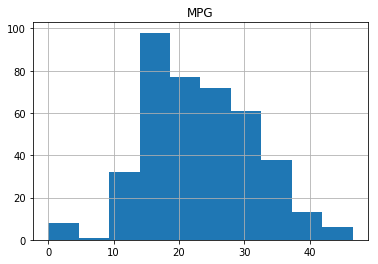

In [26]:
#histogram of MPG
cars.hist(column="MPG")
plt.show()

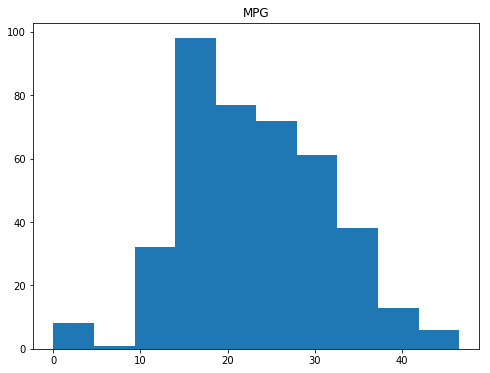

In [30]:
#Additional arguments: 
cars.hist(column="MPG",grid=False,figsize = (8,6))   #(Lengthj,height) of the plot in inches
plt.show()

*Documentation: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html*

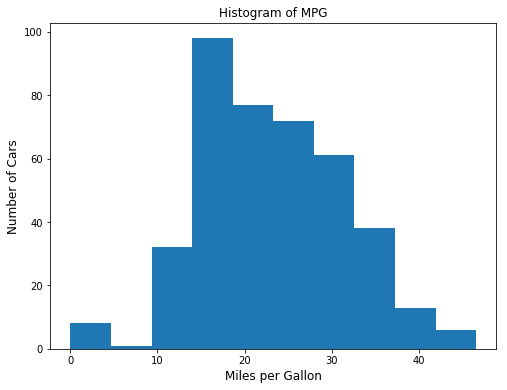

In [35]:
#Labelling the axes and giving the title

cars.hist(column="MPG",grid=False,figsize = (8,6))
plt.xlabel("Miles per Gallon",fontsize=12)
plt.ylabel("Number of Cars",fontsize=12)
plt.title("Histogram of MPG",fontsize=12)
plt.show()

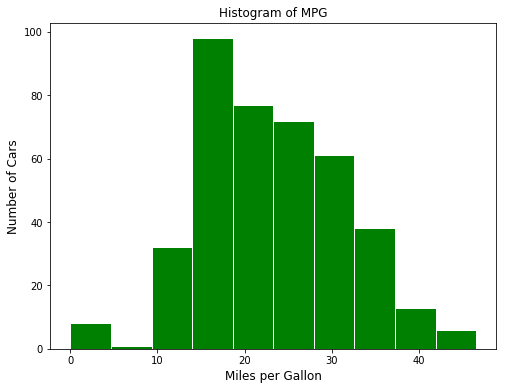

In [39]:
#Editing color and edgecolor

cars.hist(column="MPG",grid=False,figsize = (8,6),color= "green",edgecolor = "white")
plt.xlabel("Miles per Gallon",fontsize=12)
plt.ylabel("Number of Cars",fontsize=12)
plt.title("Histogram of MPG",fontsize=12)
plt.show()

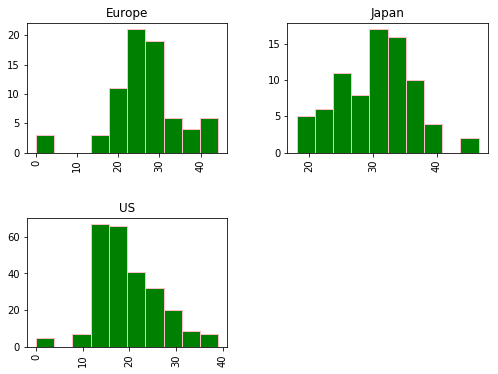

In [42]:
#Breaking up by the categories of a categorical variable


cars.hist(column="MPG",by= "Origin",grid=False,figsize = (8,6),color= "green",edgecolor = "pink")
plt.xlabel("Miles per Gallon",fontsize=12)
plt.ylabel("Number of Cars",fontsize=12)
plt.title("Histogram of MPG",fontsize=12)
plt.show()

#### 3B. Boxplots

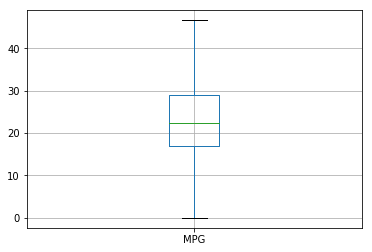

In [43]:
#Plotting a boxplot for the variable MPG
cars.boxplot(column="MPG")
plt.show()

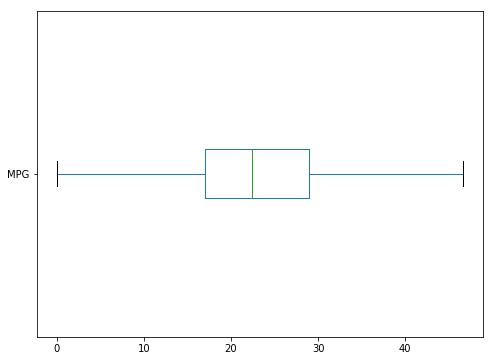

In [44]:
#Additional arguments (horizontal boxplot)
cars.boxplot(column="MPG",grid= False,figsize = (8,6),vert=False)
plt.show()


*Documentation: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html*

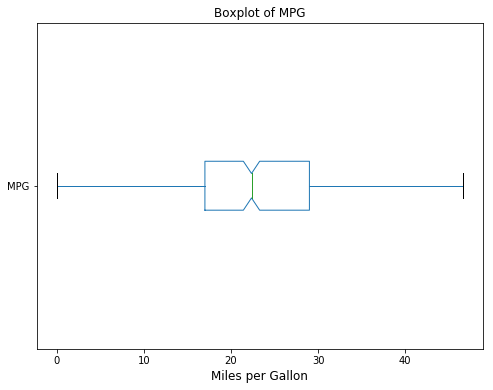

In [45]:
#Labelling the boxplot

cars.boxplot(column="MPG",notch = True,grid= False,figsize = (8,6),vert=False)

plt.xlabel("Miles per Gallon",fontsize=12)
plt.title("Boxplot of MPG",fontsize=12)
plt.show()


C:\Users\DELL\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


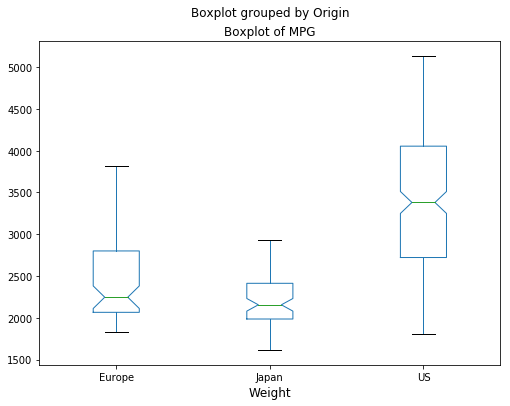

In [49]:
#Side by Side boxplot

cars.boxplot(column="Weight",notch = True,by = "Origin",grid= False,figsize = (8,6))

plt.xlabel("Weight",fontsize=12)
plt.title("Boxplot of MPG",fontsize=12)
plt.show()


In [ ]:
#after checking the graphs
# 1. Average(Centrality)
#2. Spread
#3. Skewness
#4. Outliers.

C:\Users\DELL\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


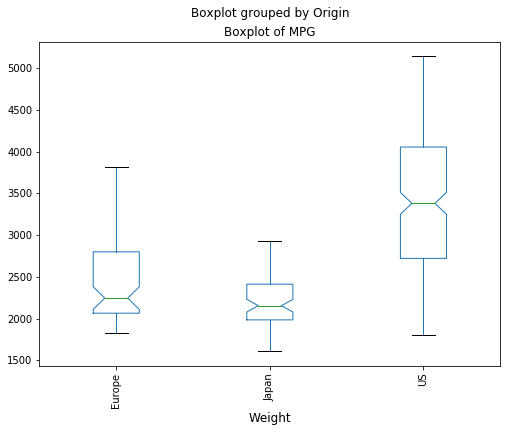

In [50]:
#The rotation argument
#Side by Side boxplot

cars.boxplot(column="Weight",notch = True,by = "Origin",grid= False,figsize = (8,6),rot=90)

plt.xlabel("Weight",fontsize=12)
plt.title("Boxplot of MPG",fontsize=12)
plt.show()

#### 3C. Bar Plots

In [5]:
cars['Origin'].value_counts()

US        254
Japan      79
Europe     73
Name: Origin, dtype: int64

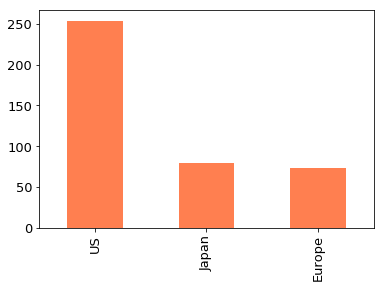

In [7]:
cars['Origin'].value_counts().plot(kind='bar',figsize=(6,4),color="coral",fontsize=13)
plt.show()

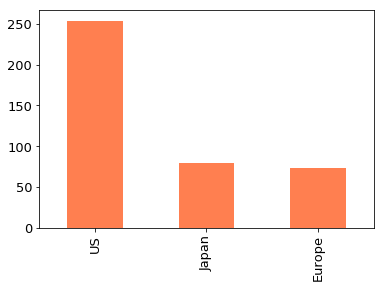

In [8]:
cars.Origin.value_counts().plot(kind='bar',figsize=(6,4),color="coral",fontsize=13)
plt.show()

Study pandas.DataFrame.plot: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html 

#### 3D. Scatter Plots

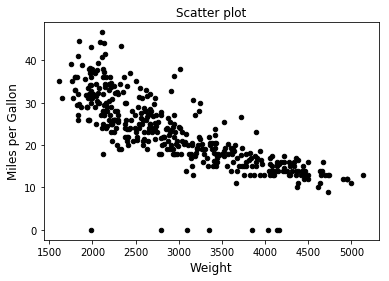

In [13]:
#Scatter plot 
cars.plot(kind="scatter",x="Weight",y="MPG",color="black",figsize=(6,4))
plt.xlabel("Weight",fontsize=12)
plt.ylabel("Miles per Gallon",fontsize=12)
plt.title("Scatter plot",fontsize=12)
plt.show()

*Documentation: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html*

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


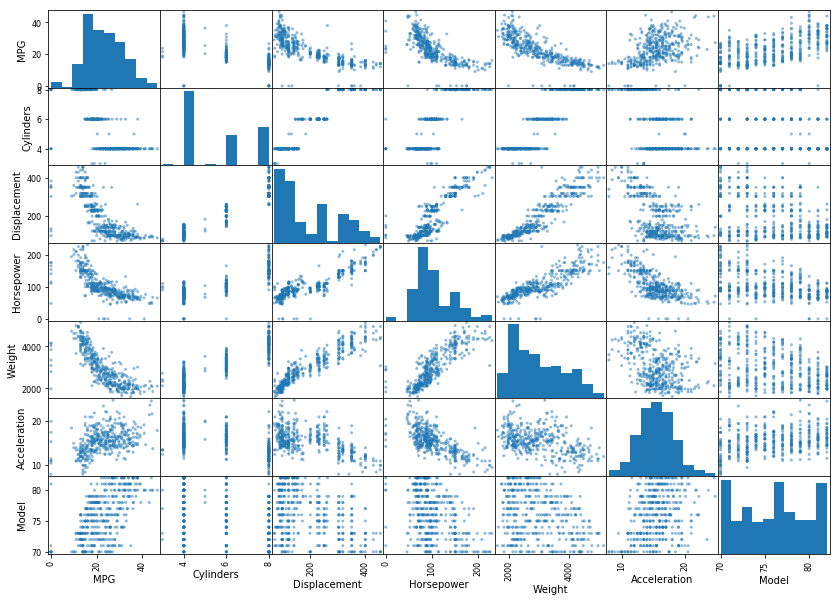

In [16]:
#Pairwise Scatterplot
from pandas.tools.plotting import scatter_matrix
scatter_matrix(cars.drop(["Car","Origin"],axis=1),alpha=0.5,figsize=(14,10),diagonal='hist')
plt.show()

#drop is used to remove the categeorical variables from the sheet.

In [17]:
#Exporting Graph
from pandas.tools.plotting import scatter_matrix
scatter_matrix(cars.drop(["Car","Origin"],axis=1),alpha=0.5,figsize=(14,10),diagonal='kde')
plt.savefig("scatter.png")

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


## Part 2 - Data Manipulation

#### 1. Sorting

In [20]:
#Sort the data in ascending order of MPG
cars.sort_values("MPG").head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
13,Plymouth Satellite (sw),0.0,8,383.0,175,4166,10.5,70,US
367,Saab 900s,0.0,4,121.0,110,2800,15.4,81,Europe
17,Ford Mustang Boss 302,0.0,8,302.0,140,3353,8.0,70,US
39,Volkswagen Super Beetle 117,0.0,4,97.0,48,1978,20.0,71,Europe
10,Citroen DS-21 Pallas,0.0,4,133.0,115,3090,17.5,70,Europe


In [23]:
#Sort the data in descending order of MPG
cars.sort_values("MPG",ascending=0).head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
329,Mazda GLC,46.6,4,86.0,65,2110,17.9,80,Japan
336,Honda Civic 1500 gl,44.6,4,91.0,67,1850,13.8,80,Japan
332,Volkswagen Rabbit C (Diesel),44.3,4,90.0,48,2085,21.7,80,Europe
402,Volkswagen Pickup,44.0,4,97.0,52,2130,24.6,82,Europe
333,Volkswagen Dasher (diesel),43.4,4,90.0,48,2335,23.7,80,Europe


In [21]:
#Sort the data in descending order of Origin and then by increasing order of MPG
cars.sort_values(["Origin","MPG"],ascending=[0,1]).head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
11,Chevrolet Chevelle Concours (sw),0.0,8,350.0,165,4142,11.5,70,US
12,Ford Torino (sw),0.0,8,351.0,153,4034,11.0,70,US
13,Plymouth Satellite (sw),0.0,8,383.0,175,4166,10.5,70,US
14,AMC Rebel SST (sw),0.0,8,360.0,175,3850,11.0,70,US
17,Ford Mustang Boss 302,0.0,8,302.0,140,3353,8.0,70,US


In [25]:
#Saving in another data frame
cars2 = cars.sort_values(["Origin","MPG"],ascending=[0,1]).head()
cars2.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
11,Chevrolet Chevelle Concours (sw),0.0,8,350.0,165,4142,11.5,70,US
12,Ford Torino (sw),0.0,8,351.0,153,4034,11.0,70,US
13,Plymouth Satellite (sw),0.0,8,383.0,175,4166,10.5,70,US
14,AMC Rebel SST (sw),0.0,8,360.0,175,3850,11.0,70,US
17,Ford Mustang Boss 302,0.0,8,302.0,140,3353,8.0,70,US


#### 2. Variable Transformation

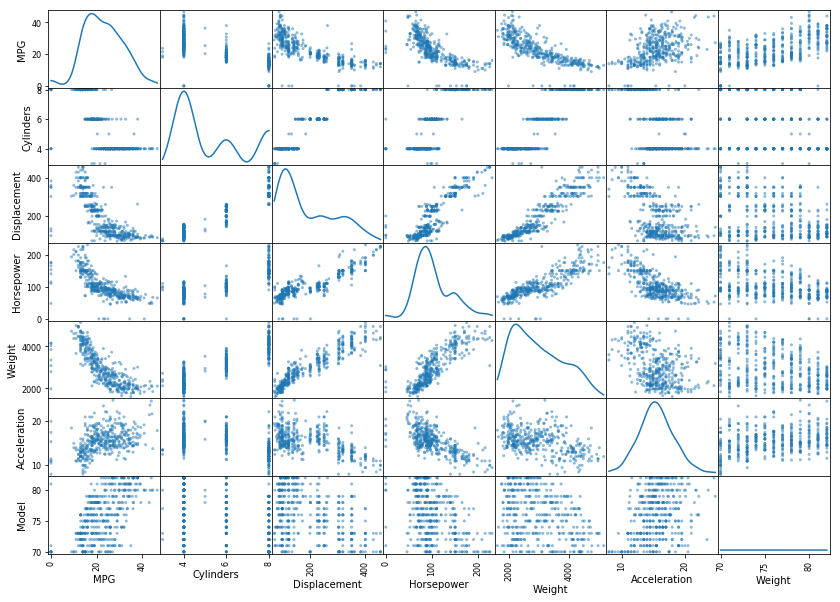

In [26]:
# Plot a scatter plot between MPG and weight. Comment of the linearity.
plt.scatter(cars.Weight,y=cars.MPG,color="black")
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.show()

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


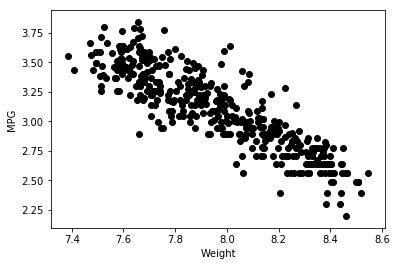

In [27]:
# Re-plot the scatter plot by taking the log transformation of both the variables. Does the linearity 
# Improve?
import numpy as np
plt.scatter(np.log(cars.Weight),y=np.log(cars.MPG),color="black")
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.show()

In [28]:
# But there is a problem! Check the summary of log(MPG). What do you observe?
cars.MPG.describe()

count    406.000000
mean      23.051232
std        8.401777
min        0.000000
25%       17.000000
50%       22.350000
75%       29.000000
max       46.600000
Name: MPG, dtype: float64

In [30]:
np.log(cars.MPG).describe()

#log0 is -infinity. SO we cannot simply use the log transformation

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


count    406.000000
mean           -inf
std             NaN
min            -inf
25%        2.833213
50%        3.106824
75%        3.367296
max        3.841601
Name: MPG, dtype: float64

In [31]:
# Can you identify where we got misleaded? Probably the answer lies in the summary of MPG.
# How can we correct this?
np.log(cars.MPG+1).describe()

#here by adding 1 we are removing the 0 values and hence the -infinity values.

count    406.000000
mean       3.085804
std        0.543030
min        0.000000
25%        2.890372
50%        3.150595
75%        3.401197
max        3.862833
Name: MPG, dtype: float64

In [ ]:
# Study the association between MPG and Horsepower. (Do Yourself)



#### The np.where() function


In [32]:
import numpy as np

In [35]:
# PROBLEM 1:
# Create a variable HP which will take only two values:
# IF Horsepower < 100 THEN "Low HP"
# IF Horsepower >= 100 THEN "High HP"

cars["HP"] = np.where(cars.Horsepower >=100,"High","Low")
cars.tail(10)

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin,HP
396,Chrysler Lebaron Medallion,26.0,4,156.0,92,2585,14.5,82,US,Low
397,Ford Grenada l,22.0,6,232.0,112,2835,14.7,82,US,High
398,Toyota Celica GT,32.0,4,144.0,96,2665,13.9,82,Japan,Low
399,Dodge Charger 2.2,36.0,4,135.0,84,2370,13.0,82,US,Low
400,Chevrolet Camaro,27.0,4,151.0,90,2950,17.3,82,US,Low
401,Ford Mustang GL,27.0,4,140.0,86,2790,15.6,82,US,Low
402,Volkswagen Pickup,44.0,4,97.0,52,2130,24.6,82,Europe,Low
403,Dodge Rampage,32.0,4,135.0,84,2295,11.6,82,US,Low
404,Ford Ranger,28.0,4,120.0,79,2625,18.6,82,US,Low
405,Chevy S-10,31.0,4,119.0,82,2720,19.4,82,US,Low


In [43]:
#PROBLEM 2:
# Create a Variable MPG_Rate which will take on the values as follows:
# IF MPG < 15 THEN "Normal"
# IF MPG >= 15 AND MPG <=25 THEN "GOOD"
# IF MPG >= 25 AND MPG <=35 THEN "GREAT"
# IF MPG >= 35 THEN "AWESOME"
c = np.where(cars.MPG >= 35, "AWESOME","")
b = np.where((cars.MPG <= 35),"GREAT",c)
a = np.where((cars.MPG <= 25),"GOOD",b)
cars["MPG_Rate"] = np.where(cars.MPG < 15,"Normal",a)
cars.tail()
#help(np.where)

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin,HP,MPG_Rate
401,Ford Mustang GL,27.0,4,140.0,86,2790,15.6,82,US,Low,GREAT
402,Volkswagen Pickup,44.0,4,97.0,52,2130,24.6,82,Europe,Low,AWESOME
403,Dodge Rampage,32.0,4,135.0,84,2295,11.6,82,US,Low,GREAT
404,Ford Ranger,28.0,4,120.0,79,2625,18.6,82,US,Low,GREAT
405,Chevy S-10,31.0,4,119.0,82,2720,19.4,82,US,Low,GREAT


## Plotting using ggplot

In [44]:
from ggplot import *

C:\Users\DELL\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\DELL\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### 1. Histogram

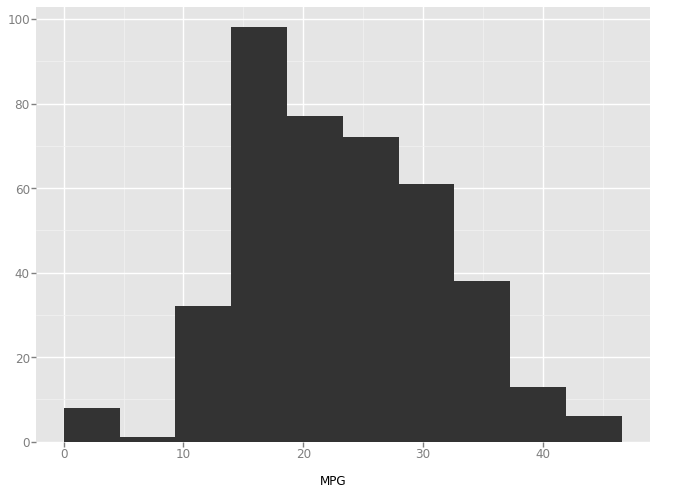

<ggplot: (143443239877)>

In [45]:
#Simple histogram using ggplot
ggplot(aes('MPG'), data = cars) + geom_histogram()

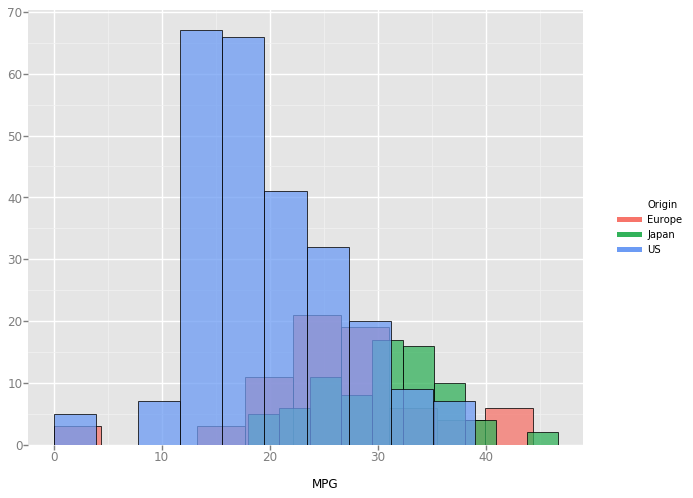

<ggplot: (-9223371893410326517)>

In [51]:
#Color coding by variable
ggplot(aes('MPG', fill = 'Origin'), data = cars) + geom_histogram(alpha=0.75,color='black')

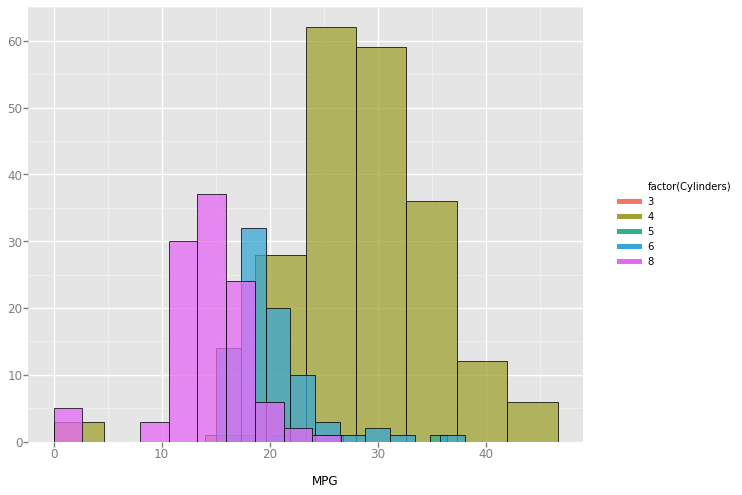

<ggplot: (-9223371893410660159)>

In [50]:
#Color coding by discrete numerical variable 
ggplot(aes('MPG', fill = 'factor(Cylinders)'), data = cars) + geom_histogram(alpha=0.75,color='black')

#factor is used to convert the discrete numberical variable to categorical variable.

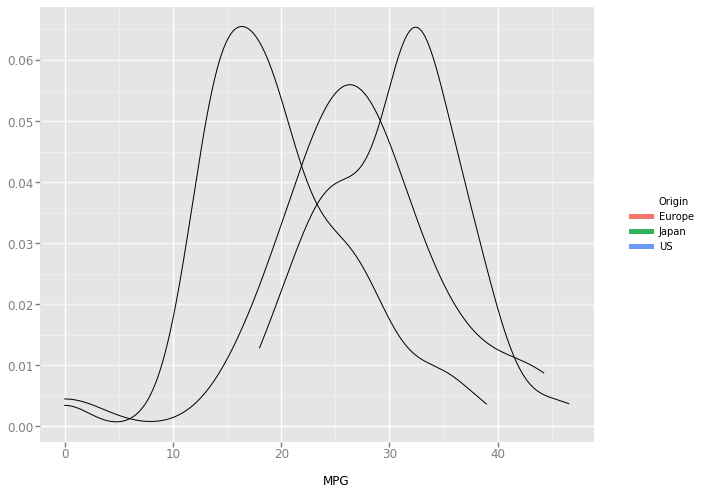

<ggplot: (-9223371893410237352)>

In [53]:
#Density plot
ggplot(aes('MPG',fill="Origin"), data = cars) + geom_density()

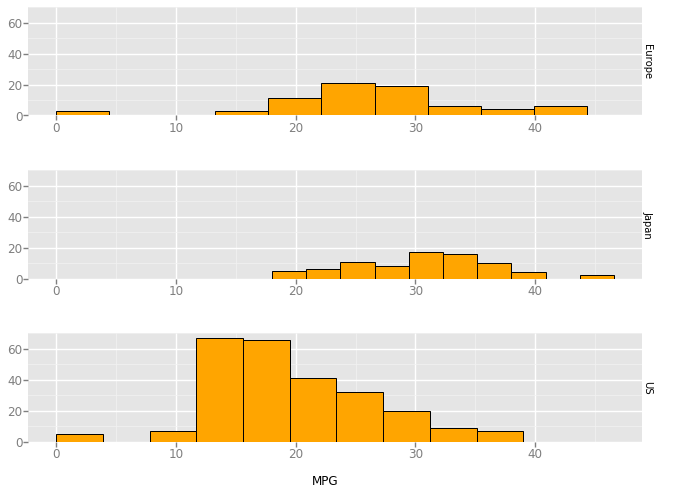

<ggplot: (-9223371893409998392)>

In [54]:
#facet-Grid
p = ggplot(aes('MPG'), data = cars) + geom_histogram(fill='orange',color='black')
p + facet_grid('Origin')

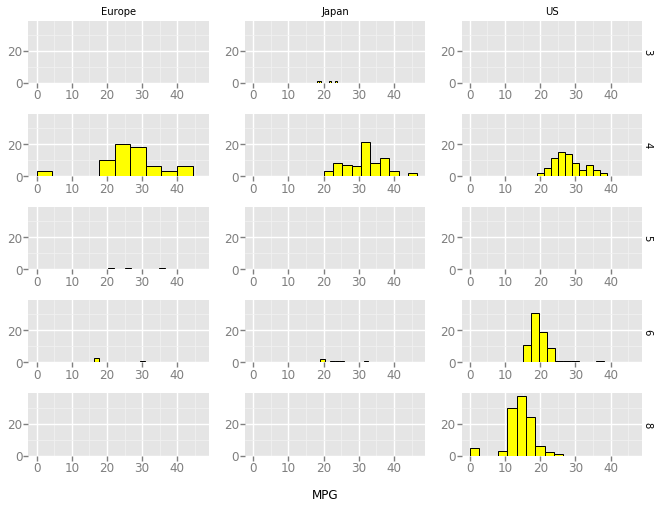

<ggplot: (-9223371893406674281)>

In [66]:
#facet-Grid
p = ggplot(aes('MPG'), data = cars) + geom_histogram(fill='yellow',color='black')
p + facet_grid('Cylinders','Origin')

### 2. Scatter Plot

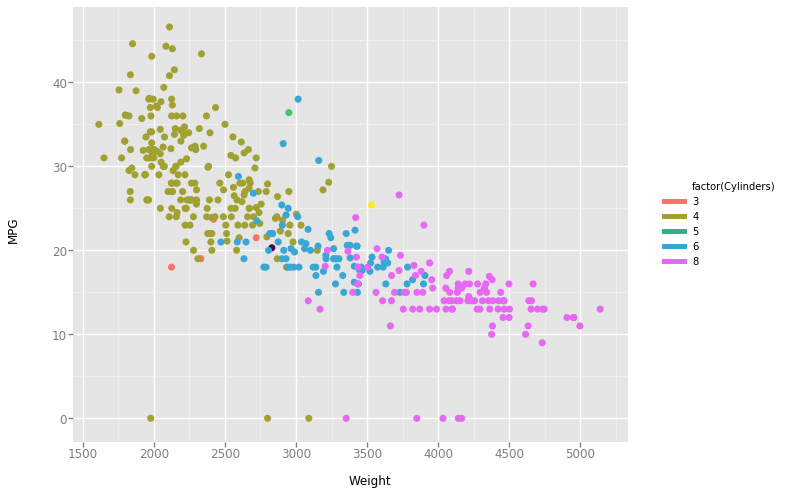

<ggplot: (-9223371893407847466)>

In [60]:
# A Simple Scatter plot with color encoding
ggplot(aes('Weight','MPG',color='factor(Cylinders)'), data = cars) + geom_point(size=50)

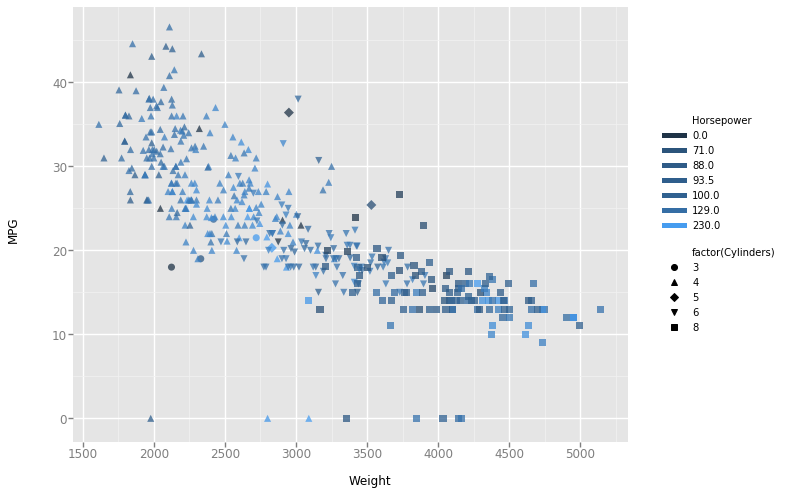

<ggplot: (-9223371893407092094)>

In [63]:
# A Simple Scatter plot with SHAPE encoding
ggplot(aes('Weight','MPG',color='Horsepower',shape='factor(Cylinders)'), data = cars) + geom_point(size=50,alpha=0.75)

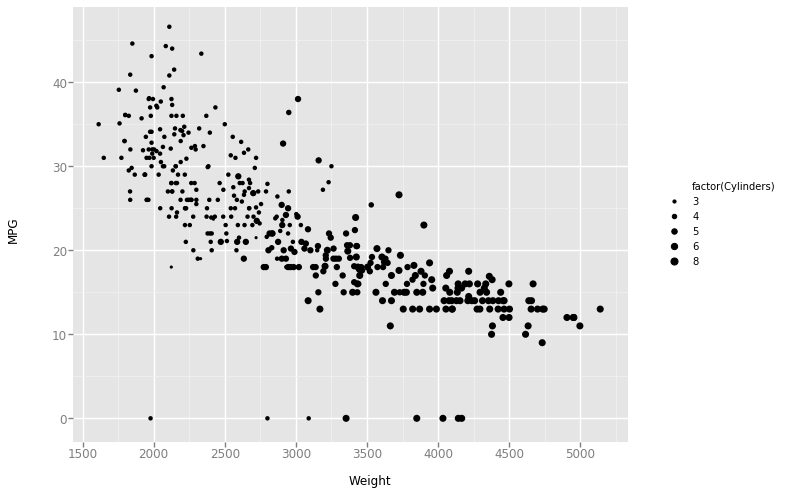

<ggplot: (143447714245)>

In [65]:
# A Simple Scatter plot with SIZE encoding
ggplot(aes('Weight','MPG',size='factor(Cylinders)'), data = cars) + geom_point()